# Exploratory Data Analysis

In this notebook, we will be taking a look at the provided dataset by conducting a quick exploratory data analysis to get a feel for the distributions and biases of the data.

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_csv("Xtern_TrainData.csv")

In [3]:
df.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [4]:
df.shape

(5000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [6]:
missing_values = df.isna()
print("\nMissing value count in each column:")
print(missing_values.sum())


Missing value count in each column:
Year          0
Major         0
University    0
Time          0
Order         0
dtype: int64


## Understanding Distribution of Categorical Columns in the Data

### "Year" Column

In [7]:
# shows how many students in the dataset are Year 1, 2, 3, or 4.

year_counts = df["Year"].value_counts()
print(year_counts)

Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: Year, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

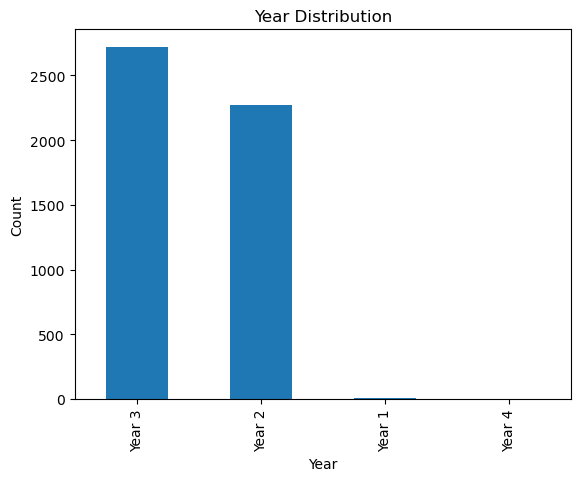

In [8]:
# generates a barplot to visualize Year Column Distribution

year_counts.plot(kind='bar')
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show

From the barplot above, we can see that the dataset exhibits a bias in the 'Year' column, with a higher frequency of Year 2 and 3 compared to Years 1 and 4. Sophomore and Junior students are more represented in the data than Freshman or Seniors. 

### "Major" Column

In [9]:
# shows how many students of each major are in the dataset

major_counts = df["Major"].value_counts()
print(major_counts)

Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: Major, dtype: int64


We can see here that the dataset contains a wide variety of majors. There are more students of certain majors like Chemistry, Biology, Astronomy, Physics, etc. than other majors like Music, Philosopy or Fine Arts

<function matplotlib.pyplot.show(close=None, block=None)>

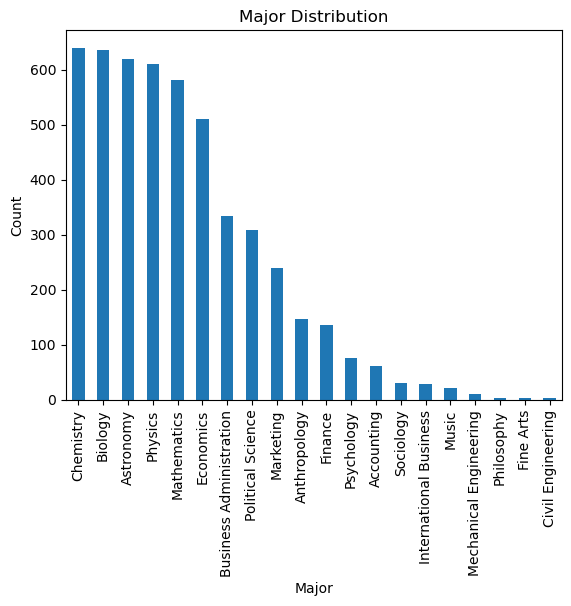

In [10]:
# generates a barplot to visualize Major Column Distribution

major_counts.plot(kind='bar')
plt.title('Major Distribution')
plt.xlabel('Major')
plt.ylabel('Count')
plt.show

### "University" Column

In [11]:
# shows what universities are represented in the dataset, and how many students from each university

university_counts = df["University"].value_counts()
print(university_counts)

Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: University, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

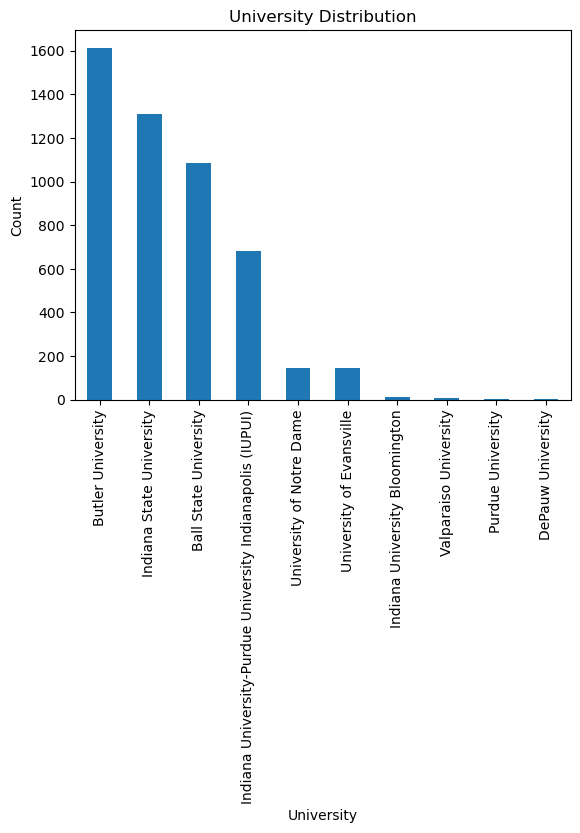

In [12]:
# generates a barplot to visualize Major Column Distribution

university_counts.plot(kind='bar')
plt.title('University Distribution')
plt.xlabel('University')
plt.ylabel('Count')
plt.show

The above barplot indicates that students from certain universities are more represented in the dataset than others. This is a potential source of bias. For the lesser represented colleges, the model we build later might not be as effective in predicting their food order.

### "Order" Column

In [13]:
# shows how many of each item was ordered

order_counts = df["Order"].value_counts()
print(order_counts)

Sugar Cream Pie                                             512
Indiana Pork Chili                                          510
Cornbread Hush Puppies                                      510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: Order, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

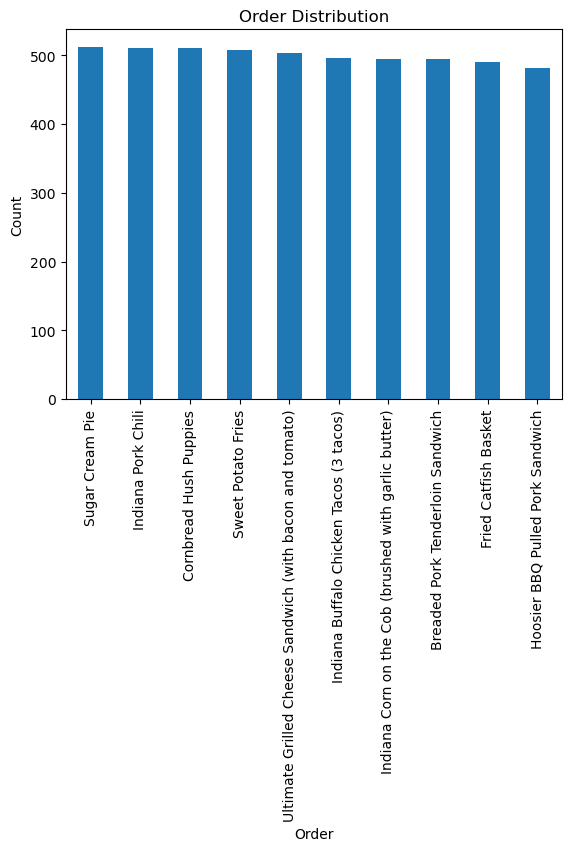

In [14]:
order_counts.plot(kind='bar')
plt.title('Order Distribution')
plt.xlabel('Order')
plt.ylabel('Count')
plt.show

From the above barplot, it is clear that the orders are pretty evenly distributed. Some items have been ordered slightly more than others, but there doesn't seem to be a bias towards certain food items. This is helpful for building our model later on. 

## Looking at Numerical Column in the Data

### "Time" Column

In [15]:
# generates summary statistics of the Time Column in our data

df['Time'].describe()

count    5000.000000
mean       12.528200
std         1.357193
min         8.000000
25%        12.000000
50%        13.000000
75%        13.000000
max        17.000000
Name: Time, dtype: float64

From the above output, we can see that in the dataset, the average time of day that they order is around 12pm. The earliest a student in the dataset ordered was 8am and the latest a student ordered was 5pm.  

In [16]:
# shows how many students ordered at each time of day in the data 

time_counts = df["Time"].value_counts()
print(time_counts)

13    1316
12    1314
14     883
11     857
15     282
10     247
16      49
9       40
8        8
17       4
Name: Time, dtype: int64


From the above output it can be seen that a majority of orders happen from 11am - 3pm. Perhaps most data collection for this dataset occured during lunchtime....

## Findings and Other Business Use Cases

#### Findings:

Conducting an Exploratory Data Analysis is useful in understanding the information contained in a large dataset such as the One provided for this Work Prompt. 

Through visualizations such as barplots, we can better understand the distribution of the categorical columns in the data. Specifically, there are more 2nd and 3rd year students in the dataset, and certain majors/colleges are more represented than others. All of these are sources of bias and mean that our model might not be as effective in predicting food orders for underrepresented groups (ie. 1st and 4th year students / students at some colleges / students studying specific majors). Other than the "feature" columns, I also took a look at the "target" column - Food order and found that there to be a relatively uniform distribution of all different orders. There were no food items that were ordered a LOT more than other items. 

Besides the categorical columns in the dataset, summary statistics provided an useful synopsis of the numerical column in the dataset - Time. 

#### Other Business Use Cases: 

This dataset can provide valuable insights for decision-making and improving various aspects of student dining services, customer engagement, and operational efficiency. For example, it can help predict demand for different food items at various times, helping dining services plan menus, allocate resources efficiently, and reduce food waste. Additionally, this information can be used to tailor marketing strategies and menu offerings. Furthermore, analyzing the dataset can help in identifying peak ordering times to allocate staff and resources accordingly, improving operational efficiency in dining facilities. Overal, this dataset is extremely useful in a variety of scenarios.